# **Build a Linear Regression model in Python**

Linear Regression models predict a continuous variable.

This code uses a dataset from Kaggle. If you want to check other datasets for linear regression in Kaggle, please check here: https://www.kaggle.com/rtatman/datasets-for-regression-analysis


Weather in Szeged 2006-2016. Please check the dataset here: https://www.kaggle.com/budincsevity/szeged-weather 

From Kaggle, following are questions that could be answered using Linear Regression

*   Is there a relationship between humidity and temperature?
*   What about between humidity and apparent temperature? 
*   Can you predict the apparent temperature given the humidity?



In [ ]:
import pandas as pd

# The exclamation mark means that we are using batch command
# The file is found here: https://github.com/mikejim/datasets_datascience/blob/main/weatherHistory.csv
# but to download it with wget you need to click on "Raw" then it will show you this URL

! wget https://raw.githubusercontent.com/mikejim/datasets_datascience/main/weatherHistory.csv

--2022-03-17 17:50:03--  https://raw.githubusercontent.com/mikejim/datasets_datascience/main/weatherHistory.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16294377 (16M) [text/plain]
Saving to: ‘weatherHistory.csv.3’

weatherHistory.csv. 100%[===================>]  15.54M  --.-KB/s    in 0.1s    

2022-03-17 17:50:04 (108 MB/s) - ‘weatherHistory.csv.3’ saved [16294377/16294377]



In [ ]:
WeatherHistory = pd.read_csv("weatherHistory.csv.3", on_bad_lines='skip')
#Last variable is the Y variable, the rest are the features
WeatherHistory

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [ ]:
print(WeatherHistory.head(0))

Empty DataFrame
Columns: [Formatted Date, Summary, Precip Type, Temperature (C), Apparent Temperature (C), Humidity, Wind Speed (km/h), Wind Bearing (degrees), Visibility (km), Loud Cover, Pressure (millibars), Daily Summary]
Index: []


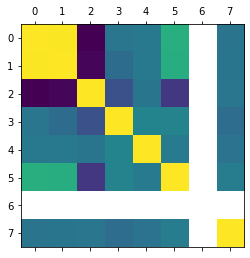

In [57]:
import matplotlib.pyplot as plt
plt.matshow(WeatherHistory.corr())
plt.show()


# plotCorrelationMatrix(WeatherHistory, 8)

In [ ]:


# We are creating the X by dropping the last column, the axis=1 means 1 column gone, 
# side by side, axis=0, means they will go one bellow the other
X = WeatherHistory.drop(['Apparent Temperature (C)'], axis=1)
X = X.drop(['Formatted Date'], axis=1)
X = X.drop(['Daily Summary'], axis=1)
X = X.drop(['Summary'], axis=1)
X = X.drop(['Precip Type'], axis=1)

#X = WeatherHistory['Humidity']


Y = WeatherHistory['Apparent Temperature (C)']
Y


0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((77162, 7), (19291, 7), (77162,), (19291,))

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model = linear_model.LinearRegression()

#X_train = X_train[:, np.newaxis, 1]

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

In [ ]:
# Given that 13 features are used, 13 coefficients are shown, one for each feature
print('Coefficients: ', model.coef_)

# The Y intercept
print('Intercept: ', model.intercept_)
print('Mean squared error (MSE): %.2f' % mean_squared_error(Y_test, Y_pred))


Coefficients:  [-9.22298395e-02  5.29278805e-02  1.25496443e-03  3.05799889e+00
 -1.78362392e+01  3.72183962e+00 -2.97276369e-03 -1.68874597e+00
  3.16663078e-01 -1.33966846e-02 -9.90856195e-01  9.68128812e-03
 -5.13641152e-01]
Intercept:  38.93302675408971
Mean squared error (MSE): 24.89
Coefficient of determination (R^2): 0.66


**Correlation**

Taken from the following article: "Correlation (otherwise known as “R”) is a number between 1 and -1 where a value of +1 implies that an increase in x results in some increase in y, -1 implies that an increase in x results in a decrease in y, and 0 means that there isn’t any relationship between x and y. Like correlation, R² tells you how related two things are. However, we tend to use R² because it’s easier to interpret. R² is the percentage of variation (i.e. varies from 0 to 1) explained by the relationship between two variables."

Here you can read more about this: 
https://towardsdatascience.com/statistics-for-machine-learning-r-squared-explained-425ddfebf667

In [ ]:
print('Coefficient of determination (R^2): %.2f' % r2_score(Y_test, Y_pred))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


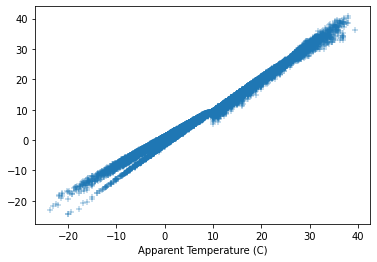

In [ ]:
import seaborn as sns
sns.scatterplot(Y_test, Y_pred, marker='+')